In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
torch.manual_seed(0)
from torch import nn
import torch.nn.functional as F
import torchzero as tz
from visualbench import FunctionDescent, test_functions

# 0. Introduction

Notebooks in this section provide an overview of various classes of optimization algorithms available in [torchzero](<../../index.md>) with explanations, visualizations and benchmarks, I also hope that the overview will be useful even if you aren't using torchzero. They don't have to be viewed in order.

For many algorithms I've included a visualization on a 2D function. Performance on 2D functions doesn't really represent performance on real problems and only serves as a way to visualize how an algorithm works. I am also in the process of adding benchmarks on a set of large scale problems to most sections.

### Classes of algorithms
1. [First order methods](<../1. First order methods>) - gradient descent with various step size choices, such as Polyak's, Barzilai–Borwein step size, line searches.
2. [Momentum](<../2. Momentum>) - Momentum methods - Polyak's momentum, Nesterov's momentum, exponential moving averages, cautious momentum, matrix momentum.
3. [Adaptive methods](<../3. Adaptive methods>) - adaptive methods most widely used for training neural networks such as Adam.
4. [Second order methods](<../4. Second order methods>) - methods that use exact second order derivatives such as Newton's method, NewtonCG, subspace Newton methods.
5. [Quasi-Newton methods](<../5. Quasi-Newton methods>) - methods that estimate second order derivatives using gradients or function values - BFGS, LBFGS, 2SPSA/2SG, etc.
6. [Conjugate gradient](<../6. Conjugate gradient>) - methods that are based on conjugate directions.
7. [Zeroth order methods](<../7. Zeroth order methods>) - methods that use only function values and do not require gradients.
8. [Line search](<../8. Line search>) - line search methods - backtracking, strong wolfe, etc.
9. [Trust region](<../9. Trust region>) - trust region and other step regularization methods - Powell's dog leg method, Levenberg–Marquardt, Cubic regularization, etc.
10. [Variance reduction](<../10. Variance reduction>) - variance reduction methods for stochastic optimization - SVRG, MARS.
11. [Regularization](<../11. Regularization>) - regularization methods such as weight decay, gradient clipping, sharpness-aware minimization.

<!--
### Advanced topics
2.1. [Preconditioning and whitening](<../2.1. Preconditioning and whitening>) - a deeper introduction to preconditioning/whitening methods.
-->

### Math
Most notebooks have a few formula written using $\mathbf{LaTeX}$. If the formulas look weird, give them some time, sometimes it takes a few seconds to load.

### Visualizations
Most visualizations are produced using the visualbench library (I will publish it soon too). It is basically a library to visualize and benchmark pytorch optimizers, so you might see something like this:

finished in 0.6s., reached loss = 8.73e-05                                      


<Axes: >

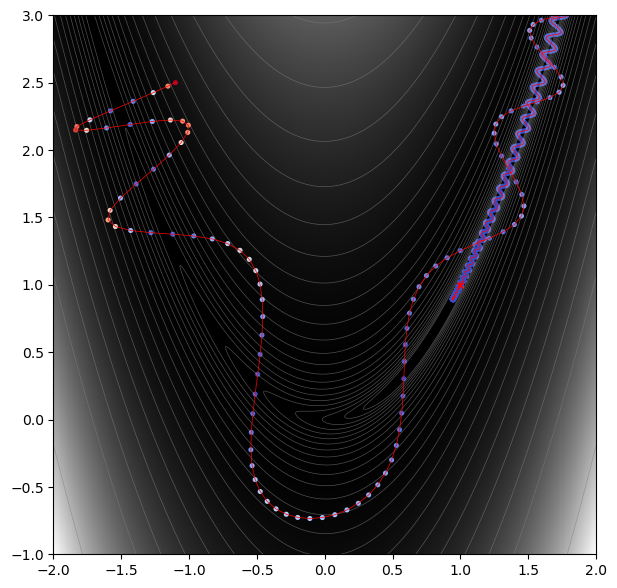

In [3]:
func = FunctionDescent('rosen')
optimizer = torch.optim.SGD(func.parameters(), 1e-4, momentum=0.99)
func.run(optimizer, max_steps=1000)
func.plot(log_contour=True)

This is equivalent to the following code:

In [4]:

def rosen(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

X = torch.tensor([-1.1, 2.5], requires_grad=True)

def closure(backward=True):
    loss = rosen(*X)
    if backward:
        X.grad = None # same as opt.zero_grad()
        loss.backward()
    return loss

optimizer = torch.optim.SGD([X], 1e-4, momentum=0.99)

losses = []
for step in range(1, 1001):
    loss = optimizer.step(closure)
    losses.append(loss)

print(min(losses))

# ... and a bunch of plotting code

tensor(8.7284e-05, grad_fn=<AddBackward0>)
